> * ## Creating neural network for text classification using imdb dataset

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [31]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

> * ## Load Data

In [7]:
max_words = 10000
maxlen    = 200

In [8]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Preparig data for education

In [9]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Create function one hot encoding

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [11]:
x_train = pad_sequences(x_train, maxlen = maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, padding='post')

In [12]:
x_train[0][:50]
len(x_train[0])
y_train[0]

1

In [13]:
maxlen = 200
model  = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6911 - val_accuracy: 0.5384
Epoch 2/10
176/176 [==============================] - 1s 4ms/step - loss: 0.6574 - accuracy: 0.6780 - val_loss: 0.5890 - val_accuracy: 0.7616
Epoch 3/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4838 - accuracy: 0.8132 - val_loss: 0.4146 - val_accuracy: 0.8456
Epoch 4/10
176/176 [==============================] - 1s 5ms/step - loss: 0.3586 - accuracy: 0.8658 - val_loss: 0.3503 - val_accuracy: 0.8612
Epoch 5/10
176/176 [==============================] - 1s 4ms/step - loss: 0.3003 - accuracy: 0.8859 - val_loss: 0.3188 - val_accuracy: 0.8732
Epoch 6/10
176/176 [==============================] - 1s 4ms/step - loss: 0.2675 - accuracy: 0.9009 - val_loss: 0.3027 - val_accuracy: 0.8800
Epoch 7/10
176/176 [==============================] - 1s 4ms/step - loss: 0.2418 - accuracy: 0.9107 - val_loss: 0.2936 - val_accuracy: 0.8824
Epoch 

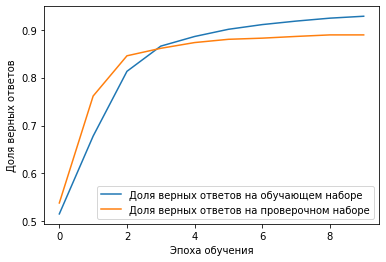

In [16]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 2ms/step - loss: 0.2906 - accuracy: 0.8776


In [18]:
print("Percentage of correct answers on test data:", round(scores[1] * 100, 4))

Percentage of correct answers on test data: 87.76


> > * ## Explore the trained dense vector representation of words

We get a matrix of dense vector representations of words

In [19]:
embedding_matrix = model.layers[0].get_weights()[0]
embedding_matrix[:5]

array([[ 0.01166719,  0.01833946],
       [ 0.1296259 , -0.12231252],
       [ 0.03768751, -0.01661181],
       [-0.03877665, -0.03081781],
       [-0.01639211,  0.02940796]], dtype=float32)

In [20]:
#LOAD DICTIONARY WITH WORD'S INDEX
word_index_org = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [21]:
# We supplement the dictionary with service characters

word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3


In [22]:
word = 'good'
word_number = word_index[word]
print('Index of word', word_number)
print('Vector for word', embedding_matrix[word_number])

Index of word 52
Vector for word [-0.18448316  0.15924989]


## SAVE TRAINED DENSE VECTOR REPRESENTATIONS TO A FILE.

In [23]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

In [28]:
# We write dense vector representations to a file
class Vector_repr:
  def __init__(self):
    self.filename = 'imdb_embeddings.csv'
    with open(self.filename, 'w') as f:
      for word_num in range(max_words):
        self.word = reverse_word_index[word_num]
        self.vec = embedding_matrix[word_num]
        f.write(self.word + ",")
        f.write(','.join([str(x) for x in vec]) + "\n")
Vector_repr
!head -n 20 $filename

<Заполнитель>,0.011667195,0.018339455
<Начало последовательности>,0.1296259,-0.122312516
<Неизвестное слово>,0.037687507,-0.016611813
<Не используется>,-0.038776647,-0.030817807
the,-0.016392108,0.02940796
and,-0.089055404,0.04542465
a,-0.005124571,-0.0030592685
of,-0.0024656188,-0.018180363
to,0.022425761,0.003455084
is,-0.05061792,0.03666045
br,0.0023849884,-0.025361305
in,-0.028937377,0.006936684
it,-0.042627484,0.12225687
i,0.008500607,0.039862555
this,0.031295177,-0.030071616
that,-0.025725435,-0.03677886
was,0.0423885,-0.05051336
as,-0.04860676,-0.019262103
for,-0.0033038906,-0.035722096
with,-0.01299489,0.005812942


In [32]:
# Save file
files.download('imdb_embeddings.csv')

 ## Visualization of dense vector representations of words

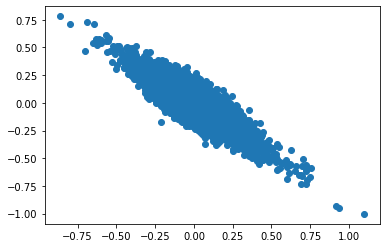

In [33]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

In [34]:
# We select the word codes by which you can determine the tone of the recall

review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.48038876,  0.5155258 ],
       [-0.49822983,  0.5095313 ],
       [-0.61334234,  0.58002883],
       [-0.18448316,  0.15924989],
       [ 0.5546181 , -0.53057635],
       [ 0.93411404, -0.95278937],
       [ 0.53243953, -0.49315336],
       [ 0.6897151 , -0.6489719 ],
       [ 0.34914142, -0.1597223 ]], dtype=float32)

## Visualization of a trained dense vector representation of words by which you can determine the emotional coloring of the text

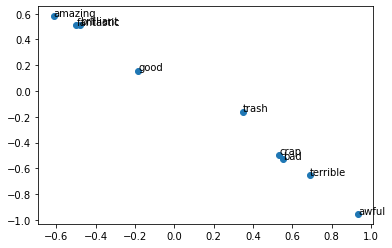

In [35]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))